In [12]:
import NeuralNetwork as nn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

# Circulos
from sklearn.datasets import make_circles

# Lunas

from sklearn.datasets import make_moons

# Para reconocimiento de imágenes
import numpy as np
import matplotlib.pyplot as plt
import NeuralNetwork
from keras.datasets import mnist
from keras.utils import np_utils

# Para replicabilidad
np.random.seed(204596)

In [13]:
def random_points(n = 100):
    x = np.random.uniform(0, 1, n)
    y = np.random.uniform(0, 1, n)

    return np.array([x, y]).T

  0%|          | 0/5000 [00:00<?, ?it/s]/mnt/c/Users/sap98/OneDrive/Escritorio/My_Stuff/programming/Uniandes/SysBio/Proyecto/StochasticPerceptron/NeuralNetwork.py:270: RuntimeWarning: invalid value encountered in log
  prop = -np.log(pesos[0]) * (pesos[0] > 0.5) * 1.0
/mnt/c/Users/sap98/OneDrive/Escritorio/My_Stuff/programming/Uniandes/SysBio/Proyecto/StochasticPerceptron/NeuralNetwork.py:29: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x)) # Función de activación sin derivar.
100%|██████████| 5000/5000 [00:01<00:00, 4327.62it/s]


Text(0, 0.5, 'Input A')

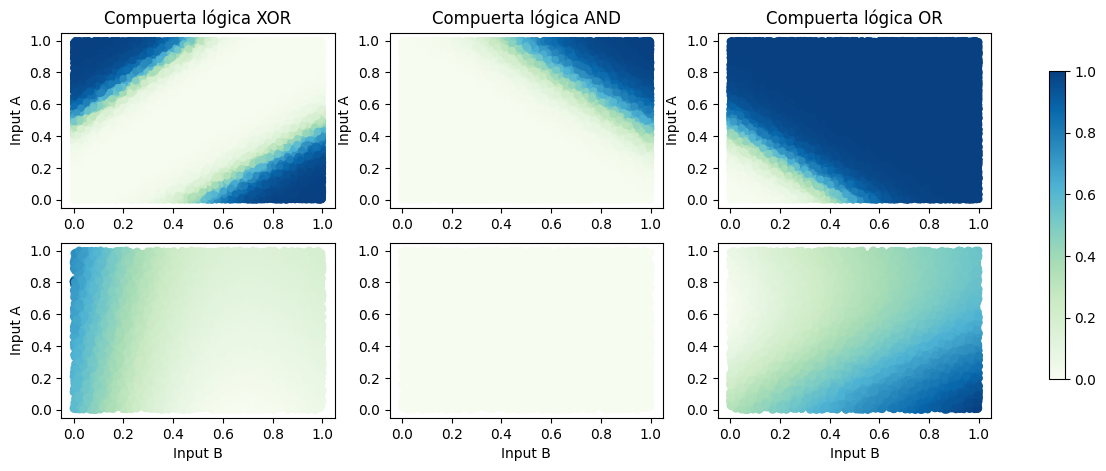

In [14]:
y_train_array = [np.array([[0], [1], [1], [0]]), np.array([[0], [0], [0], [1]]), np.array([[0], [1], [1], [1]])]
names = ['XOR', 'AND', 'OR']

fig, ax = plt.subplots(2, 3, figsize=(15, 5))

for i in range(3):
    red_xor = nn.crear_modelo_de_red([2,4, 1])
    dataset_n = 1000

    x_array = np.array([[0,0],[0,1],[1,0],[1,1]]) #* dataset_n
    y_array = y_train_array[i] #* dataset_n

    X = np.array(x_array)
    Y = np.array(y_array)
    #
    funcion_de_activacion = nn.sigmoide
    red_entrenada = nn.entrenar_red_neuronal(red_xor, funcion_de_activacion, nn.mean_squared_error,valor_de_prediccion=X, valor_real=Y, epochs=5000, tasa_de_aprendizaje=5.0)
    # 
    x_test = random_points(n = 50000)
    y_test = nn.predecir(x_test, red_entrenada, funcion_de_activacion)
    #
    ax[0, i].scatter(x_test[:,0], x_test[:,1], c = y_test, s = 20, cmap='GnBu') # GnBu
    # 
    ax[0, i].set_title(f'Compuerta lógica {names[i]}')
    ax[0, i].set_ylabel('Input A')
    
for i in range(3):
    red_xor = nn.crear_modelo_de_red([2,4, 1])
    dataset_n = 1

    x_array = np.array([[0,0],[0,1],[1,0],[1,1]]) * dataset_n
    y_array = y_train_array[i] * dataset_n

    X = np.array(x_array)
    Y = np.array(y_array)
    #
    funcion_de_activacion = nn.sigmoide
    red_entrenada = nn.entrenar_red_con_gillespie(red_xor, funcion_de_activacion, nn.mean_squared_error,valor_de_prediccion=X, valor_real=Y, epochs=5000, tasa_de_aprendizaje=5.0)
    # 
    x_test = random_points(n = 10000)
    y_test = nn.predecir(x_test, red_entrenada, funcion_de_activacion)
    #
    ax[1, i].scatter(x_test[:,0], x_test[:,1], c = y_test, s = 25, cmap='GnBu') # GnBu
    ax[1, i].set_xlabel('Input B')
    
fig.colorbar(ScalarMappable(norm=None, cmap='GnBu'), ax=ax, aspect=20, shrink=0.8)    
ax[1, 0].set_ylabel('Input A')
    

100%|██████████| 5000/5000 [00:02<00:00, 1783.18it/s]


Text(0.45, 0.98, 'Clasificación de círculos')

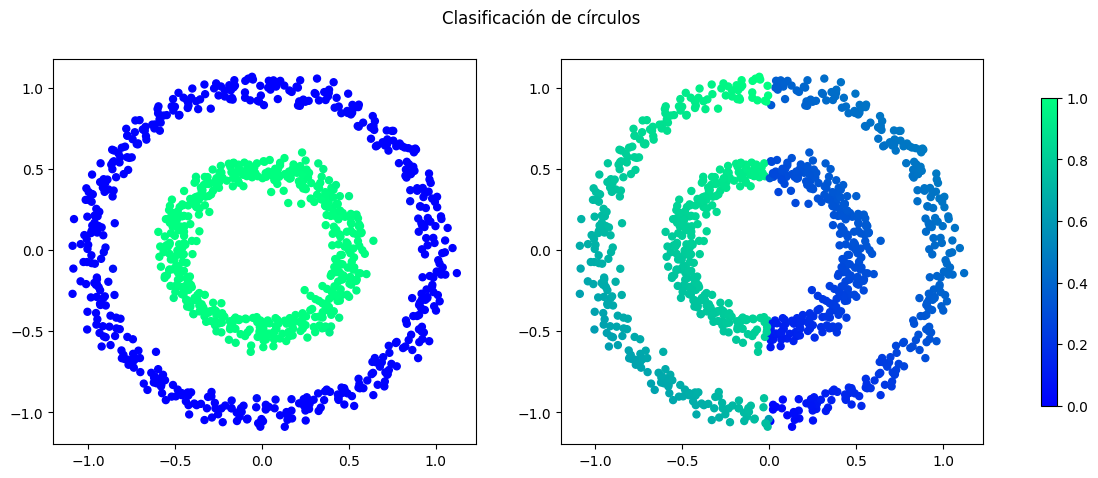

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

# Datos de entrenamiento
X, Y = make_circles(n_samples = 1000, noise = 0.05, factor = 0.5)
Y = Y.reshape(len(X), 1)

# Redes Neuronales
red_circulos = nn.crear_modelo_de_red([2, 4, 8, 1])
red_circulos_gillespie = nn.crear_modelo_de_red([2, 4, 8, 1])

# Función de Activación
funcion_de_activacion = nn.sigmoide

# Training
red_de_circulos_entrenada = nn.entrenar_red_neuronal(red_circulos, funcion_de_activacion, nn.mean_squared_error,valor_de_prediccion=X, valor_real=Y, epochs=5000, tasa_de_aprendizaje=0.05)
red_de_circulos_entrenada_gillespie = nn.entrenar_red_con_gillespie(red_circulos_gillespie, funcion_de_activacion, nn.mean_squared_error,valor_de_prediccion=X, valor_real=Y, epochs=5000, tasa_de_aprendizaje=0.05)

# Testing
y_test = nn.predecir(X, red_de_circulos_entrenada, funcion_de_activacion)
y_test_gillespie = nn.predecir(X, red_de_circulos_entrenada_gillespie, funcion_de_activacion)

# Plotting
ax[0].scatter(X[:,0], X[:,1], c = y_test, cmap = 'winter', s = 25)
ax[1].scatter(X[:,0], X[:,1], c = y_test_gillespie, cmap = 'winter', s = 25)
fig.colorbar(ScalarMappable(norm=None, cmap='winter'), ax=ax, aspect=20, shrink=0.8)    
fig.suptitle('Clasificación de círculos', x=0.45)

100%|██████████| 10000/10000 [00:07<00:00, 1394.11it/s]


Text(0.45, 0.98, 'Clasificación de formas de luna')

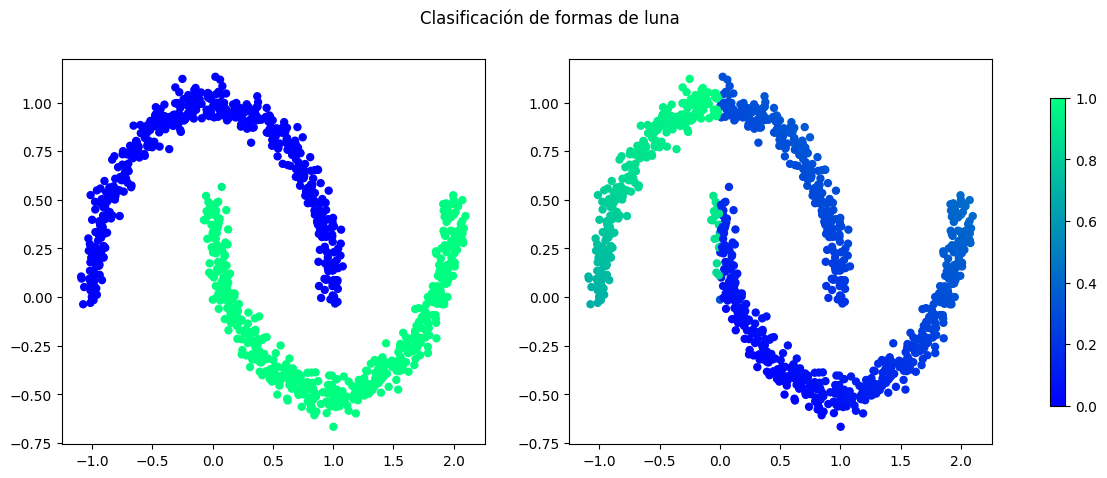

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

# Redes Neuronales
red_lunas = nn.crear_modelo_de_red([2, 4, 8, 1])
red_lunas_gillespie = nn.crear_modelo_de_red([2, 4, 8, 1])

# Datos de entrenamiento
X, Y = make_moons(n_samples = 1000, noise = 0.05)
Y = Y.reshape(len(X), 1)

# Función de Activación
funcion_de_activacion = nn.sigmoide

# Training
red_lunas_entrenada = nn.entrenar_red_neuronal(red_lunas, funcion_de_activacion, nn.mean_squared_error,valor_de_prediccion=X, valor_real=Y, epochs=10000, tasa_de_aprendizaje=0.05)
red_lunas_entrenada_gillespie = nn.entrenar_red_con_gillespie(red_lunas_gillespie, funcion_de_activacion, nn.mean_squared_error,valor_de_prediccion=X, valor_real=Y, epochs=10000, tasa_de_aprendizaje=0.05)

# Testing
y_test = nn.predecir(X, red_lunas_entrenada, funcion_de_activacion)
y_test_gillespie = nn.predecir(X, red_lunas_entrenada_gillespie, funcion_de_activacion)

# Plotting
ax[0].scatter(X[:,0], X[:,1], c = y_test, cmap = 'winter', s = 25)
ax[1].scatter(X[:,0], X[:,1], c = y_test_gillespie, cmap = 'winter', s = 25)
fig.colorbar(ScalarMappable(norm=None, cmap='winter'), ax=ax, aspect=20, shrink=0.8)
fig.suptitle('Clasificación de formas de luna', x=0.45)

In [17]:
red_neuronal_imagenes = NeuralNetwork.crear_modelo_de_red([784, 15, 10])

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('int64')

# normalizamos las entradas desde 0-255 a 0-1
X_train = X_train / 255
X_test = X_test / 255
print(X_train.shape)

# una codificacion en caliente a la salida
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
num_classes = Y_train.shape[1]

#
funcion_de_activacion = NeuralNetwork.sigmoide
red_imagenes_entrenada = NeuralNetwork.entrenar_red_neuronal(red_neuronal_imagenes,funcion_de_activacion,NeuralNetwork.mean_squared_error,valor_de_prediccion=X_train, valor_real=Y_train, epochs=15, tasa_de_aprendizaje=0.8)

# X test
image_to_predict = 90
print(Y_train[image_to_predict])

# y_reslt = NeuralNetwork.predecir(X_test[3].reshape(1, 784), red_entrenada, NeuralNetwork.sigmoide)
y_reslt = NeuralNetwork.predecir(X_train[image_to_predict], red_imagenes_entrenada, funcion_de_activacion)
print((y_reslt > 0.8)*1.0)

(60000, 784)


100%|██████████| 30/30 [00:16<00:00,  1.87it/s]

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
